<a href="https://colab.research.google.com/github/Zadkaiv/30-days-of-c.repo/blob/main/Arbol%20de%20decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESION LOGISTICA: Para hacer una clasificacion en solo dos posibles opciones o predecir una probabilidad

In [ ]:
#Titanic prediction

In [ ]:
import pandas as pd
datos = pd.read_csv('/content/U4_04_train (1).csv')

In [ ]:
datos.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

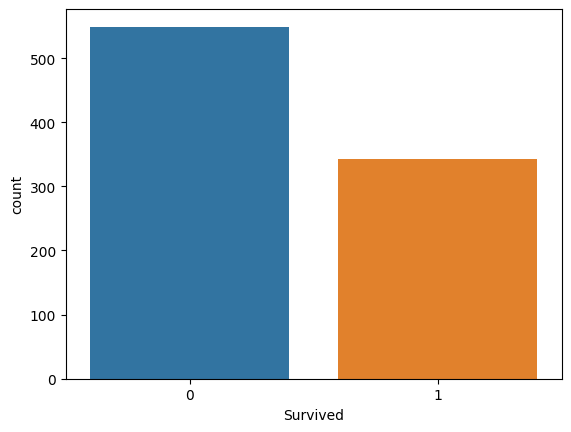

In [ ]:
import seaborn as sb
sb.countplot(x='Survived', data=datos)

<Axes: xlabel='Survived', ylabel='count'>

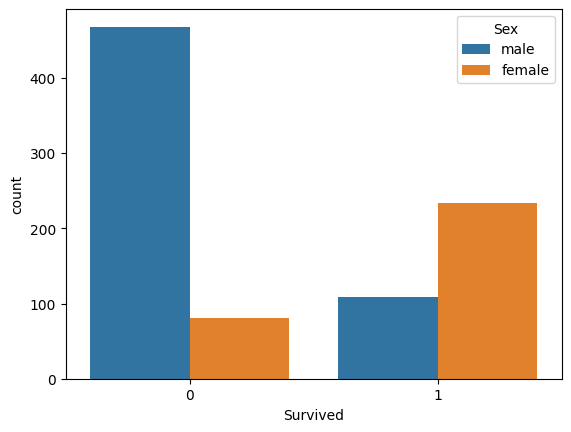

In [ ]:
sb.countplot(x='Survived', data=datos, hue='Sex')

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

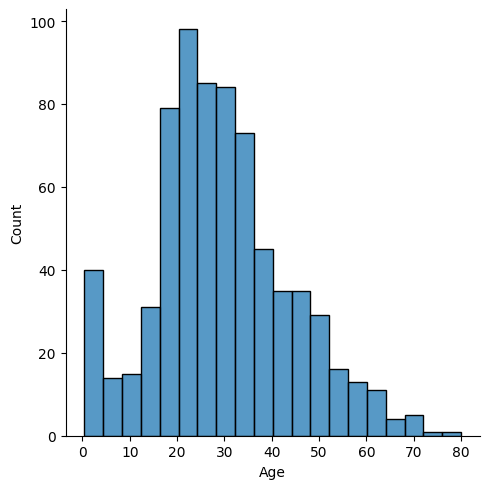

In [ ]:
sb.displot(x='Age', data=datos)

In [ ]:
datos['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
datos['Age'].mean()

29.69911764705882

In [ ]:
datos['Age'].fillna(datos['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
datos = datos.drop(['Cabin'], axis=1)

In [ ]:
datos['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
datos = datos.dropna()

In [ ]:
datos['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
datos = datos.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [ ]:
dummies_sex = pd.get_dummies(datos['Sex'], drop_first=True)
#multicollinearity = el modelo encuentra relaciones que no deberian haber

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.drop(['Sex'], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

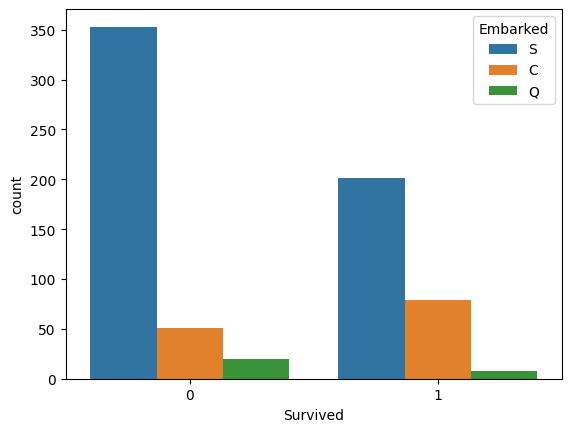

In [ ]:
sb.countplot(x='Survived', data=datos, hue='Embarked')

In [ ]:
dummies_embarked = pd.get_dummies(datos['Embarked'], drop_first=True)

In [ ]:
datos = datos.join(dummies_embarked)
datos = datos.drop(['Embarked'], axis=1)

<Axes: >

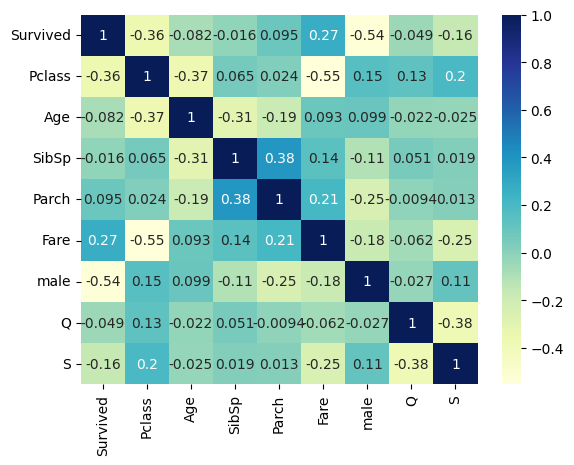

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

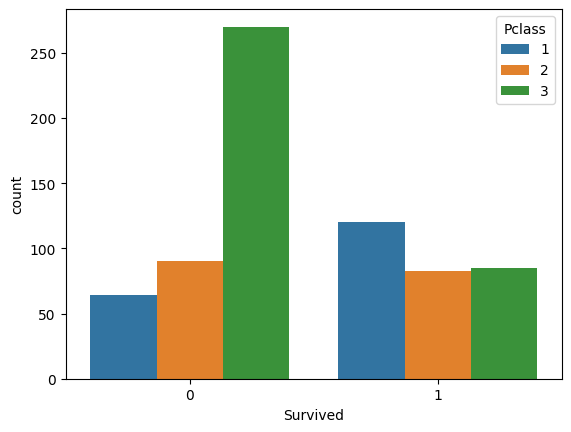

In [ ]:
sb.countplot(x='Survived', data=datos, hue='Pclass')

In [ ]:
x=datos.drop('Survived', axis=1)
y=datos['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_ent, x_pru, y_ent, y_pru = train_test_split(x, y, test_size=.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(x_ent, y_ent)

LogisticRegression(max_iter=1000)

In [ ]:
predicciones = modelo.predict(x_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7622377622377622

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.71      0.63      0.67        54

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.76      0.76      0.76       143



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[75, 14],
       [20, 34]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=['Pred:No', 'Pred:Si'], index=['Real : No', 'Real : Si'])

,Pred:No,Pred:Si
Real : No,75,14
Real : Si,20,34


In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
nueva_persona = [3, 17, 0, 0, 10, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print('Sobreviviste')
else:
  print('no sobreviviste')

Sobreviviste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
